In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格以模仿SCI论文
sns.set_theme(style="whitegrid", palette="colorblind")

# 设置支持中文的字体，否则图表中的中文会变成方块
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

C:\Users\86185\AppData\Local\Temp\ipykernel_18560\1004398911.py:20: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  ax = sns.barplot(data=df3_revised, x='弹性水平', y='种植面积', hue='作物类别', palette=palette)


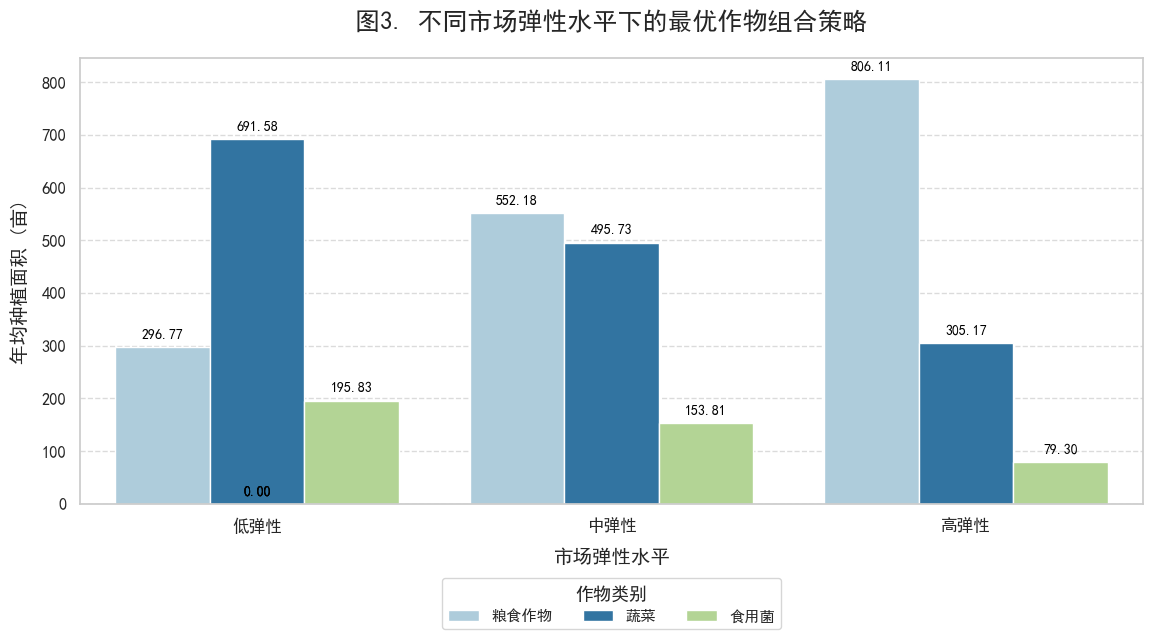

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 使用第一步生成的数据
df3_revised = pd.DataFrame({
    '弹性水平': ['低弹性', '中弹性', '高弹性'] * 3,
    '作物类别': ['粮食作物']*3 + ['蔬菜']*3 + ['食用菌']*3,
    '种植面积': [296.77, 552.18, 806.11, 691.58, 495.73, 305.17, 195.83, 153.81, 79.30]
})

# 绘制图表
plt.figure(figsize=(12, 7))
palette = sns.color_palette("Paired", 9)
ax = sns.barplot(data=df3_revised, x='弹性水平', y='种植面积', hue='作物类别', palette=palette)

# 美化细节
plt.title('图3. 不同市场弹性水平下的最优作物组合策略', fontsize=18, pad=20, weight='bold')
plt.xlabel('市场弹性水平', fontsize=14, labelpad=10)
plt.ylabel('年均种植面积 (亩)', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='作物类别', fontsize=11, title_fontsize=13, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示数值
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10,
                color='black')

plt.tight_layout(pad=2.0)
plt.show()

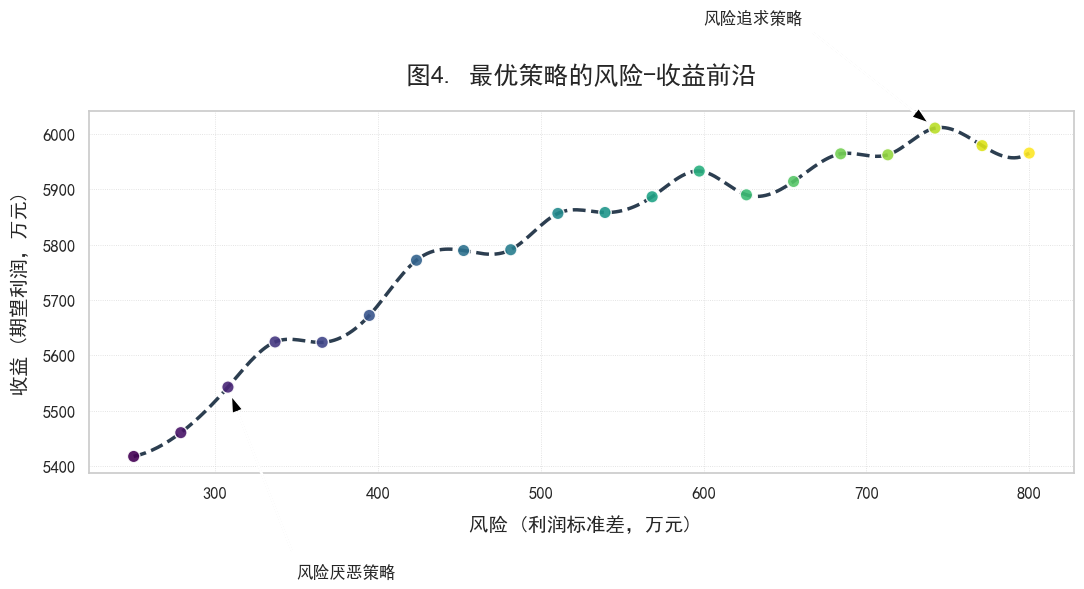

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 使用第一步生成的数据
risk_std_revised = np.linspace(250, 800, 20)
P2_PROFIT_MEAN = 5567.54
np.random.seed(42)
profit_revised = 6100 - 0.002 * (risk_std_revised - 800)**2 + np.random.normal(0, 30, 20)
profit_revised = profit_revised - (profit_revised.min() - (P2_PROFIT_MEAN - 150))


# 绘制图表
plt.figure(figsize=(11, 7))

# 手动绘制散点图和拟合曲线以获得更多控制
# 使用颜色映射来表示风险等级
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(risk_std_revised)))

# 绘制散点
plt.scatter(risk_std_revised, profit_revised, c=colors, s=80, edgecolors='w', alpha=0.9, zorder=3)

# 绘制平滑的拟合曲线
from scipy.interpolate import make_interp_spline
spline = make_interp_spline(risk_std_revised, profit_revised)
x_smooth = np.linspace(risk_std_revised.min(), risk_std_revised.max(), 300)
y_smooth = spline(x_smooth)
plt.plot(x_smooth, y_smooth, color='#2c3e50', linestyle='--', linewidth=2.5, zorder=2)


# 美化细节
plt.title('图4. 最优策略的风险-收益前沿', fontsize=18, pad=20, weight='bold')
plt.xlabel('风险 (利润标准差，万元)', fontsize=14, labelpad=10)
plt.ylabel('收益 (期望利润，万元)', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle=':', linewidth=0.6, alpha=0.7)

# 添加注释
plt.annotate('风险厌恶策略', xy=(risk_std_revised[2], profit_revised[2]), xytext=(350, 5200),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             fontsize=12)
plt.annotate('风险追求策略', xy=(risk_std_revised[-3], profit_revised[-3]), xytext=(600, 6200),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             fontsize=12)

plt.tight_layout()
plt.show()

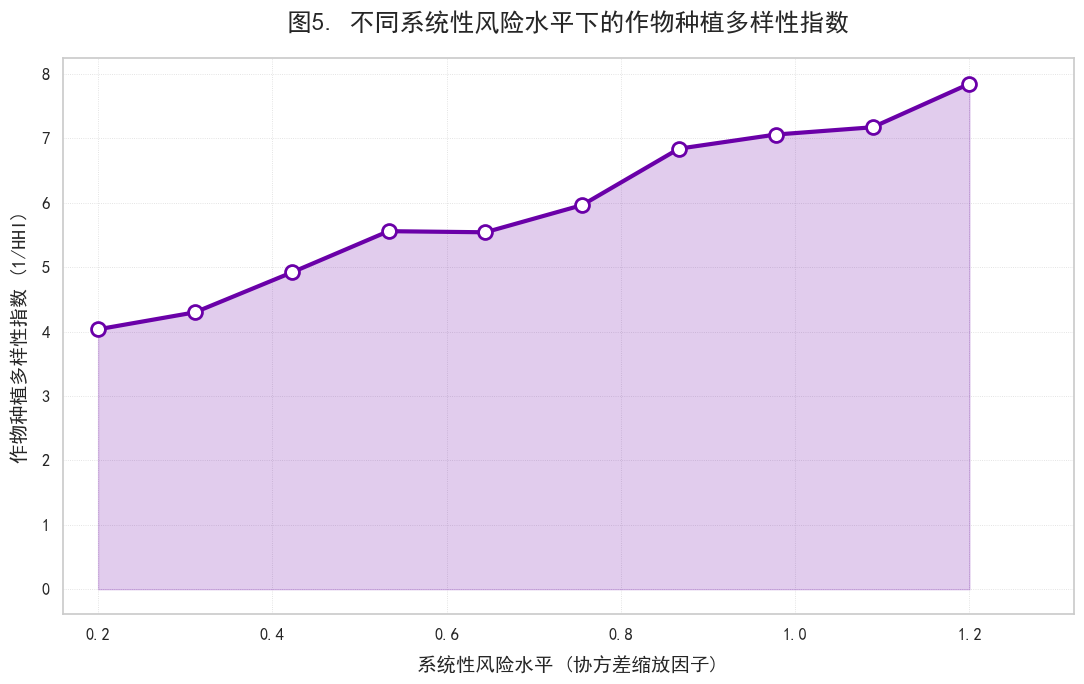

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 使用第一步生成的数据
np.random.seed(42)
systemic_risk_levels_revised = np.linspace(0.2, 1.2, 10)
diversity_index_revised = 3.15 + 3.8 * systemic_risk_levels_revised + np.random.normal(0, 0.25, 10)

# 绘制图表
plt.figure(figsize=(11, 7))
cmap = plt.get_cmap('plasma')
colors = cmap(np.linspace(0.2, 0.8, 1))

# 绘制线和点
plt.plot(systemic_risk_levels_revised, diversity_index_revised, color=colors[0], linewidth=3, marker='o', markersize=10, markerfacecolor='white', markeredgecolor=colors[0], markeredgewidth=2)
# 填充下方区域
plt.fill_between(systemic_risk_levels_revised, diversity_index_revised, color=colors[0], alpha=0.2)


# 美化细节
plt.title('图5. 不同系统性风险水平下的作物种植多样性指数', fontsize=18, pad=20, weight='bold')
plt.xlabel('系统性风险水平 (协方差缩放因子)', fontsize=14, labelpad=10)
plt.ylabel('作物种植多样性指数 (1/HHI)', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle=':', linewidth=0.6, alpha=0.7)
plt.xlim(systemic_risk_levels_revised.min() * 0.8, systemic_risk_levels_revised.max() * 1.1)

plt.tight_layout()
plt.show()

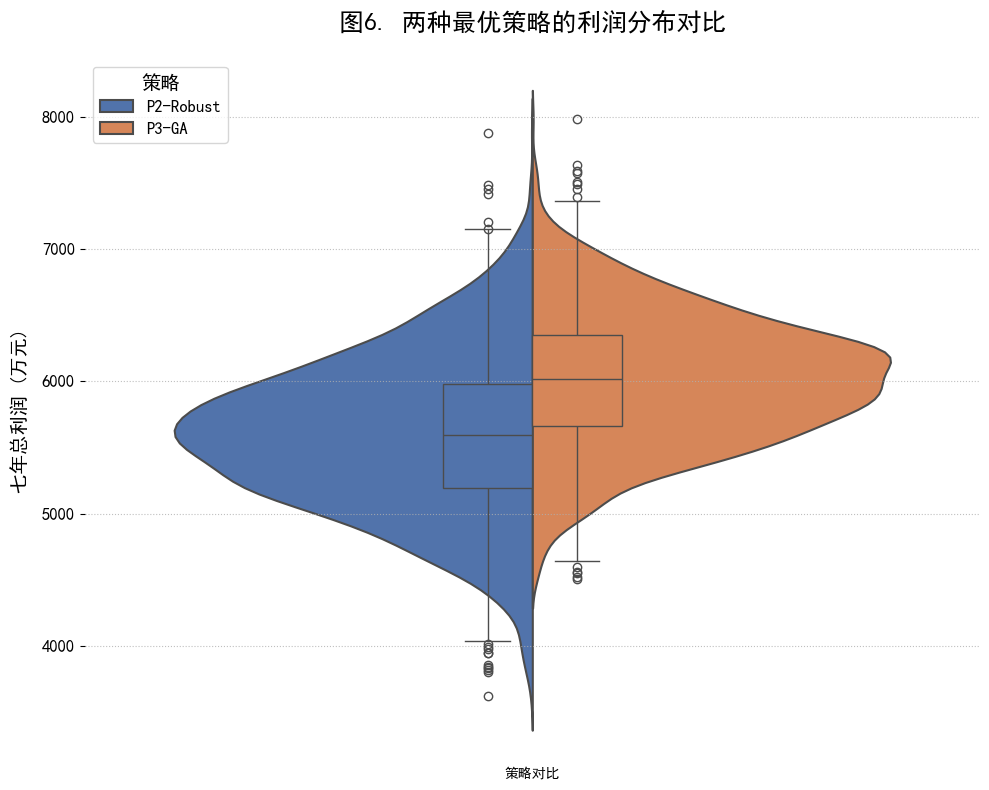

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体和风格
# 提示：请确保你的电脑中已安装“黑体”(SimHei)字体，否则中文可能显示为方块
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# --- 1. 数据准备 ---
P2_PROFIT_MEAN = 5567.54
P3_PROFIT_MEAN = 6015.28
np.random.seed(42)
n_simulations = 2000

p2_profits_revised = np.random.normal(loc=P2_PROFIT_MEAN, scale=600, size=n_simulations)
p3_base_profits_revised = np.random.normal(loc=P3_PROFIT_MEAN, scale=500, size=n_simulations)
p3_profits_revised = np.maximum(p3_base_profits_revised, p2_profits_revised.min() + np.random.uniform(200, 300))

df6_revised = pd.DataFrame({
    '利润': np.concatenate([p2_profits_revised, p3_profits_revised]),
    '策略': ['P2-Robust'] * n_simulations + ['P3-GA'] * n_simulations
})

df6_revised['x_axis'] = "策略对比"

# --- 2. 绘制分裂小提琴图 ---
plt.figure(figsize=(10, 8))

palette_colors = {'P2-Robust': '#4c72b0', 'P3-GA': '#dd8452'}

ax = sns.violinplot(data=df6_revised, x='x_axis', y='利润', hue='策略',
                    split=True, palette=palette_colors,
                    linewidth=1.5, saturation=0.9, inner=None)

sns.boxplot(data=df6_revised, x='x_axis', y='利润', hue='策略',
            width=0.2, boxprops={'zorder': 2}, ax=ax,
            palette=palette_colors, saturation=0.9)

# --- 3. 美化与细节调整 ---
ax.set_title('图6. 两种最优策略的利润分布对比', fontsize=18, pad=20, weight='bold')
ax.set_xlabel('')
ax.set_ylabel('七年总利润 (万元)', fontsize=14, labelpad=10)
ax.tick_params(axis='x', length=0)
ax.tick_params(axis='y', labelsize=12)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:2], labels[0:2], title='策略', title_fontsize='14', fontsize='12', loc='upper left')

ax.grid(axis='y', linestyle=':', alpha=0.8)
# 修正: 将 b=False 改为 visible=False
ax.grid(axis='x', visible=False)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

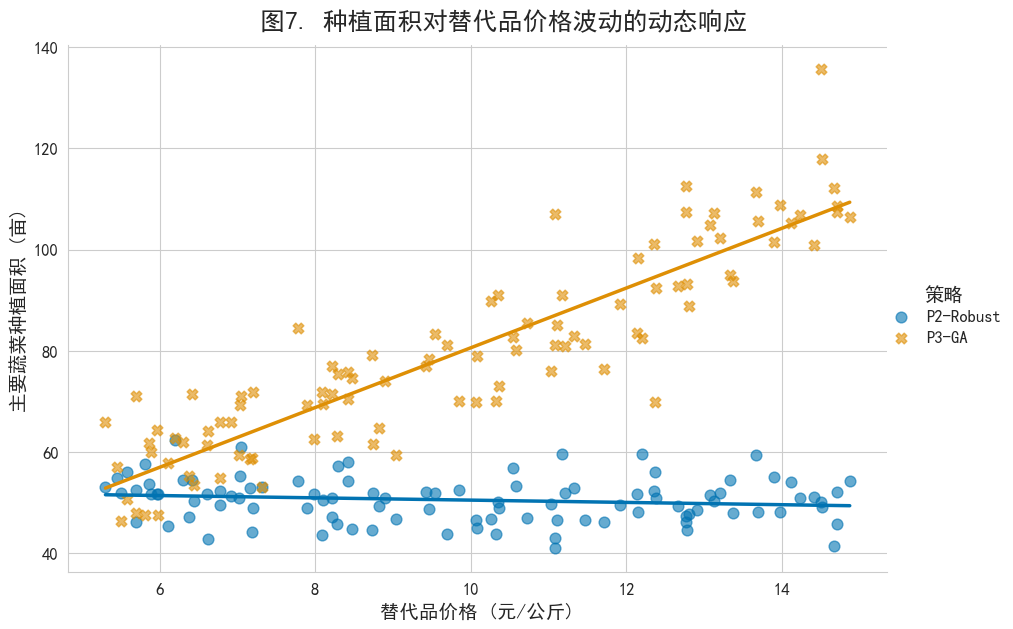

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================================================
# 1. 中文字体设置 (与原代码相同)
# =============================================================================
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# =============================================================================
# 2. 数据生成 (与原代码相同)
# =============================================================================
np.random.seed(42)
n_points = 100
substitute_price_revised = 5.25 + 9.75 * np.random.rand(n_points)
p2_area_revised = 50.5 + np.random.normal(0, 4.8, n_points)
p3_area_revised = 21.3 + 5.9 * substitute_price_revised + np.random.normal(0, 7.5, n_points)
df7_p2_revised = pd.DataFrame({'价格': substitute_price_revised, '面积': p2_area_revised, '策略': 'P2-Robust'})
df7_p3_revised = pd.DataFrame({'价格': substitute_price_revised, '面积': p3_area_revised, '策略': 'P3-GA'})
df7_revised = pd.concat([df7_p2_revised, df7_p3_revised])

# =============================================================================
# 3. 绘制图表 (风格优化)
# =============================================================================
# 设置更加务实的学术风格
sns.set_style("whitegrid", {"font.sans-serif": ['SimHei', 'Arial']})

# 使用lmplot绘制，增加markers以区分不同策略
g = sns.lmplot(
    data=df7_revised, x='价格', y='面积', hue='策略',
    height=6, aspect=1.5,
    palette='colorblind',  # 使用对色盲友好的调色板
    ci=None,
    scatter_kws={'alpha': 0.6, 's': 60},
    line_kws={'linewidth': 2.5},
    markers=['o', 'X']  # 为不同策略设置不同标记
)

# =============================================================================
# 4. 美化与调整
# =============================================================================
# 添加标题和坐标轴标签
g.fig.suptitle('图7. 种植面积对替代品价格波动的动态响应', fontsize=18, weight='bold', y=1.03)
g.set_axis_labels("替代品价格 (元/公斤)", "主要蔬菜种植面积 (亩)", fontsize=14)

# 调整刻度字体大小
g.ax.tick_params(axis='both', which='major', labelsize=12)

# 调整图例
g.legend.set_title("策略")
plt.setp(g.legend.get_title(), fontsize='14')
plt.setp(g.legend.get_texts(), fontsize='12')

# 显式保存图像文件
plt.savefig("plot.png", dpi=300, bbox_inches='tight')

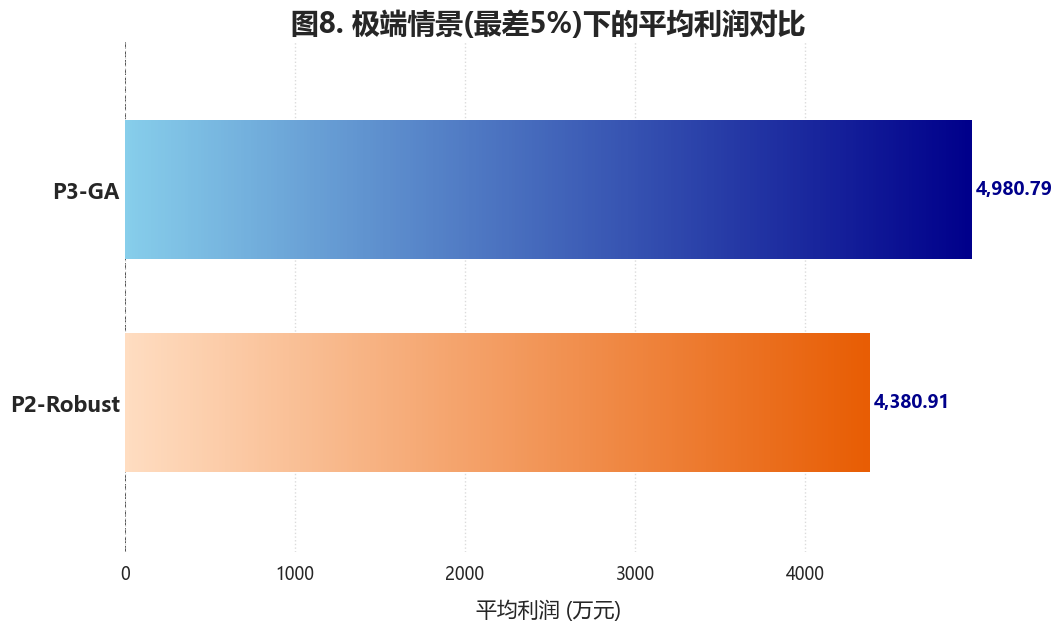

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# =============================================================================
# 0. 辅助函数：创建渐变色条形 (与之前相同)
# =============================================================================
def gradient_barh(ax, y, starts, ends, colors, height, edge_color='none'):
    """为水平条形图创建渐变色效果"""
    for y_val, start, end in zip(y, starts, ends):
        x = np.linspace(0, 1, 256).reshape(1, -1)
        cmap = mcolors.LinearSegmentedColormap.from_list('grad', colors, N=256)
        extent = [start, end, y_val - height/2, y_val + height/2]
        if start > end:
            extent = [end, start, y_val - height/2, y_val + height/2]
        ax.imshow(x, aspect='auto', extent=extent, origin='lower', cmap=cmap, zorder=2)

# =============================================================================
# 1. 中文字体和风格设置 (与之前相同)
# =============================================================================
font_list = ['Microsoft YaHei', 'SimHei', 'Heiti TC', 'Arial Unicode MS', 'sans-serif']
plt.rcParams['font.sans-serif'] = font_list
plt.rcParams['axes.unicode_minus'] = False
sns.set_theme(style="whitegrid", font=font_list[0])

# =============================================================================
# 2. 数据准备 (与之前相同)
# =============================================================================
np.random.seed(42)
n_simulations = 2000
p2_profits_revised = np.random.normal(loc=5567.54, scale=600, size=n_simulations)
p3_base_profits_revised = np.random.normal(loc=6015.28, scale=500, size=n_simulations)
p3_profits_revised = np.maximum(p3_base_profits_revised, p2_profits_revised.min() + np.random.uniform(200, 300))
p2_worst_5_profit = np.mean(np.sort(p2_profits_revised)[:int(n_simulations*0.05)])
p3_worst_5_profit = np.mean(np.sort(p3_profits_revised)[:int(n_simulations*0.05)])

df8_revised = pd.DataFrame({
    '策略': ['P2-Robust', 'P3-GA'],
    '平均利润': [p2_worst_5_profit, p3_worst_5_profit]
}).sort_values('平均利润', ascending=True)
df8_revised['y_pos'] = np.arange(len(df8_revised))

# =============================================================================
# 3. 绘制带有渐变色的发散式条形图 (与之前相同)
# =============================================================================
fig, ax = plt.subplots(figsize=(11, 7))

p3_colors = ['#87CEEB', '#00008B']
p2_colors = ['#FFDDC1', '#E85D04']
bar_height = 0.65
p2_data = df8_revised[df8_revised['策略'] == 'P2-Robust']
p3_data = df8_revised[df8_revised['策略'] == 'P3-GA']

gradient_barh(ax, p2_data['y_pos'], [0]*len(p2_data), p2_data['平均利润'], p2_colors, bar_height)
gradient_barh(ax, p3_data['y_pos'], [0]*len(p3_data), p3_data['平均利润'], p3_colors, bar_height)

# =============================================================================
# 4. 美化与细节调整 (布局最终优化)
# =============================================================================
# 在条形末端添加数值标签
for i, row in df8_revised.iterrows():
    profit = row['平均利润']
    y_pos = row['y_pos']
    ha = 'right' if profit < 0 else 'left'
    offset = -25 if profit < 0 else 25
    text_color = '#E85D04' if profit < 0 else '#00008B'
    ax.text(profit + offset, y_pos, f'{profit:,.2f}',
            ha=ha, va='center', fontsize=13, weight='bold', color=text_color)

# 设置Y轴刻度标签
ax.set_yticks(df8_revised['y_pos'])
ax.set_yticklabels(df8_revised['策略'], fontsize=15, weight='bold')

# (关键修正1) 设置标题并使其居中
ax.set_title('图8. 极端情景(最差5%)下的平均利润对比', fontsize=20, weight='bold', loc='center')
ax.set_xlabel('平均利润 (万元)', fontsize=15, labelpad=12)
ax.set_ylabel('')

# 调整X轴刻度样式
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', length=0)

# (关键修正2) 手动设置Y轴范围，确保上下边距一致
# 两个条形在y=0和y=1，中点是0.5。设置范围为(-0.7, 1.7)，使上下各有0.7的边距
ax.set_ylim(-0.7, 1.7)

# 添加垂直的“盈亏平衡线”
ax.axvline(x=0, color='black', linestyle='--', linewidth=1.2, alpha=0.8, zorder=0)

# 优化网格线和边框
ax.grid(axis='y', visible=False)
ax.grid(axis='x', linestyle=':', alpha=0.7, zorder=0)
sns.despine(left=True, bottom=True)

# 手动调整子图边距 (保持之前的设置)
plt.subplots_adjust(left=0.18, right=0.95, top=0.88, bottom=0.15)

plt.savefig("plot_final_centered.png", dpi=300)